In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [4]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = tf.keras.preprocessing.image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(224,224,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|█████████████████████████████████████████████████████████████████████████████| 7254/7254 [00:41<00:00, 175.65it/s]


In [5]:
X.shape

(7254, 224, 224, 3)

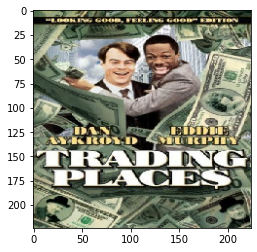

In [6]:
plt.imshow(X[2])

In [7]:
train['Genre'][2]

"['Comedy']"

In [8]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [10]:
model = tf.keras.models.Sequential()


In [11]:
model.add(tf.keras.layers.Conv2D(filters=16, 
                                kernel_size=(3, 3),
                                activation='relu',
                                input_shape=(224, 224, 3)))

In [12]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(tf.keras.layers.Dropout(0.25))

In [14]:
model.add(tf.keras.layers.Conv2D(filters=32, 
                                kernel_size=(3, 3),
                                activation='relu'))

In [15]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(tf.keras.layers.Dropout(0.25))

In [17]:
model.add(tf.keras.layers.Conv2D(filters=64, 
                                kernel_size=(3, 3),
                                activation='relu'))

In [18]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [19]:
model.add(tf.keras.layers.Dropout(0.25))

In [20]:
model.add(tf.keras.layers.Conv2D(filters=64, 
                                kernel_size=(3, 3),
                                activation='relu'))

In [21]:
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [22]:
model.add(tf.keras.layers.Dropout(0.25))

In [23]:
model.add(tf.keras.layers.Flatten())

In [24]:
model.add(tf.keras.layers.Dense(128, 
                               activation = 'relu'))

In [25]:
model.add(tf.keras.layers.Dense(128, 
                               activation='relu'))

In [26]:
model.add(tf.keras.layers.Dense(25,
                               activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 6528 samples, validate on 726 samples
Epoch 1/10
5376/6528 [=======================>......] - ETA: 27s - loss: 0.2761 - accuracy: 0.9067

In [31]:

img = tf.keras.preprocessing.image.load_img('GOT.jpg',target_size=(224,224,3))
img = tf.keras.preprocessing.image.img_to_array(img)
img = img/255

[[0.07752158 0.06033029 0.00948221 0.01550126 0.01945489 0.05986753
  0.02001669 0.10908034 0.01149747 0.10085303 0.01106553 0.13600071
  0.01462007 0.0048105  0.09819499 0.00145863 0.00281913 0.00113317
  0.02055819 0.09238709 0.03286137 0.00549141 0.0827116  0.00845709
  0.00382522]]
Horror (0.136)
Drama (0.109)
Fantasy (0.101)


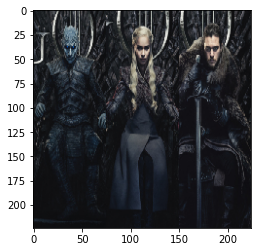

In [33]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,224,224,3))
print(proba)
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)